In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
train = pd.read_json('input/train.json', orient='records')
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [10]:
train.inc_angle = train.inc_angle.replace('na',0)
train_images = []
for i, row in train.iterrows():
    band_1 = np.array(row['band_1']).reshape(75, 75)
    band_2 = np.array(row['band_2']).reshape(75, 75)
    train_images.append(np.dstack((band_1,band_2)))
train_images = np.array(train_images)

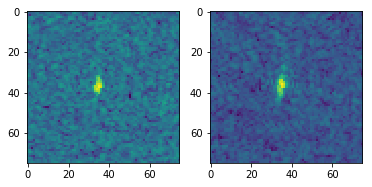

In [23]:
train_images = np.array(train_images)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.imshow(train_images[0,:,:,1])
ax2.imshow(train_images[0,:,:,0])
plt.show()

In [19]:
def color_composite(data):
    rgb_arrays = []
    for i, row in data.iterrows():
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 / band_2

        r = (band_1 + abs(band_1.min())) / np.max((band_1 + abs(band_1.min())))
        g = (band_2 + abs(band_2.min())) / np.max((band_2 + abs(band_2.min())))
        b = (band_3 + abs(band_3.min())) / np.max((band_3 + abs(band_3.min())))

        rgb = np.dstack((r, g, b))
        rgb_arrays.append(rgb)
    return np.array(rgb_arrays)

rgb_train = color_composite(train)

Looking at random ships


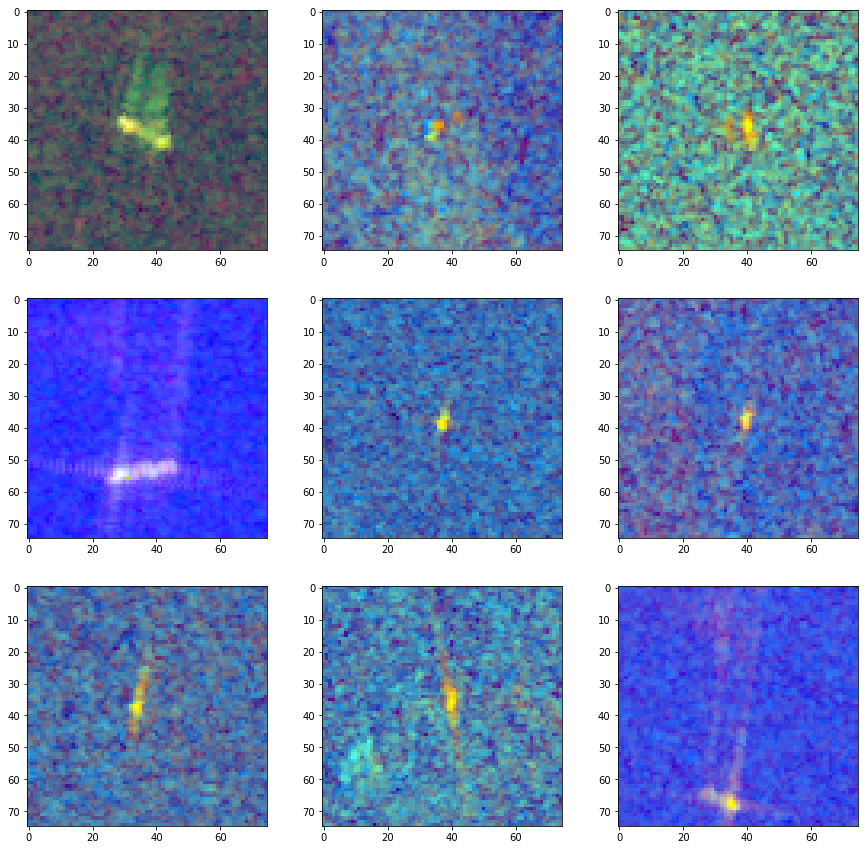

In [20]:
# look at random ships
print('Looking at random ships')
ships = np.random.choice(np.where(train.is_iceberg ==0)[0], 9)
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = rgb_train[ships[i], :, :]
    ax.imshow(arr)
    
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import pylab
#Take a look at a iceberg
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
plotmy3d(rgb_train[12,:,:,0], 'iceberg')

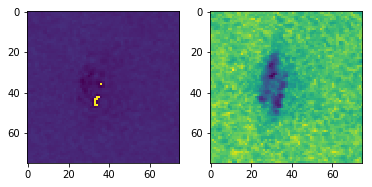

In [29]:
def MP_composite(data):
    MP_arrays = []
    for i, row in data.iterrows():
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 / band_2

        M = np.hypot(band_1,band_2)
        P = np.arctan2(band_1,band_2)

        MP = np.dstack((M,P))
        MP_arrays.append(MP)
    return np.array(MP_arrays)

MP_train = MP_composite(train)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.imshow(MP_train[12,:,:,1])
ax2.imshow(MP_train[12,:,:,0])
plt.show()

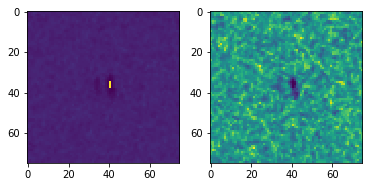

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.imshow(MP_train[ships[2],:,:,1])
ax2.imshow(MP_train[ships[2],:,:,0])
plt.show()

([array([  0.,   0.,   0.,   5.,  24.,  24.,  12.,  10.,   0.,   0.]),
  array([  0.,   0.,   0.,   3.,  25.,  29.,   9.,   8.,   1.,   0.]),
  array([  0.,   0.,   0.,   3.,  28.,  26.,  15.,   3.,   0.,   0.]),
  array([  0.,   0.,   0.,   8.,  19.,  24.,  22.,   2.,   0.,   0.]),
  array([  0.,   0.,   0.,   5.,  18.,  27.,  16.,   7.,   2.,   0.]),
  array([  0.,   0.,   0.,   8.,  29.,  16.,  10.,  11.,   0.,   1.]),
  array([  0.,   0.,   1.,   8.,  29.,  18.,  17.,   2.,   0.,   0.]),
  array([  0.,   0.,   0.,   2.,  25.,  26.,  16.,   2.,   4.,   0.]),
  array([  0.,   0.,   0.,   2.,  24.,  29.,  17.,   2.,   1.,   0.]),
  array([  0.,   0.,   0.,   6.,  27.,  35.,   5.,   2.,   0.,   0.]),
  array([  0.,   0.,   0.,   9.,  20.,  32.,  13.,   1.,   0.,   0.]),
  array([  0.,   0.,   0.,   4.,  21.,  30.,  14.,   4.,   2.,   0.]),
  array([  0.,   0.,   0.,   5.,  12.,  27.,  26.,   5.,   0.,   0.]),
  array([  0.,   0.,   1.,   3.,  21.,  28.,  14.,   8.,   0.,   0.]),
  arra

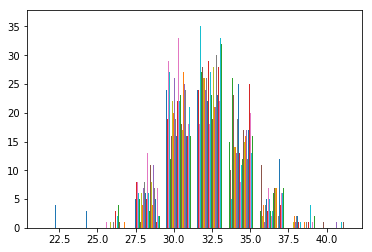

In [37]:
plt.hist(MP_train[ships[2],:,:,0])

In [39]:
#Import Keras.
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

Using TensorFlow backend.


In [43]:
#define our model
def getModel():
    #Building the model
    gmodel=Sequential()
    #Conv Layer 1
    gmodel.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 2)))
    gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 2
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 3
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 4
    gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    gmodel.add(Flatten())

    #Dense Layers
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Dense Layer 2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))

    mypotim=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    gmodel.compile(loss='binary_crossentropy',
                  optimizer=mypotim,
                  metrics=['accuracy'])
    gmodel.summary()
    return gmodel


def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=5)

In [44]:
target_train=train['is_iceberg']
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(MP_train, target_train, random_state=1, train_size=0.75)

In [45]:
#Without denoising, core features.
import os
gmodel=getModel()
gmodel.fit(X_train_cv, y_train_cv,
          batch_size=24,
          epochs=50,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 73, 73, 64)        1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [46]:
gmodel.load_weights(filepath=file_path)
score = gmodel.evaluate(X_valid, y_valid, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

401/401 [==============================] - 3s 8ms/step
Test loss: 0.265666087518
Test accuracy: 0.8827930182


In [48]:
test = pd.read_json("input/test.json")

In [50]:
#MP_test = MP_composite(test)
predicted_test=gmodel.predict_proba(MP_test)
submission = pd.DataFrame()
submission['id']=test['id']
submission['is_iceberg']=predicted_test.reshape((predicted_test.shape[0]))
submission.to_csv('sub.csv', index=False)

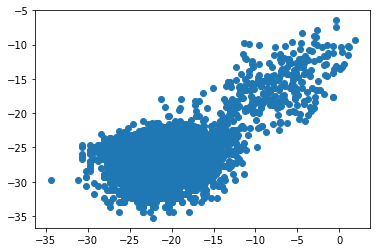

In [55]:
img1 = train.loc[12][['band_1','band_2']] # this is an iceberg
plt.scatter(img1.band_1, img1.band_2)
plt.show()

0


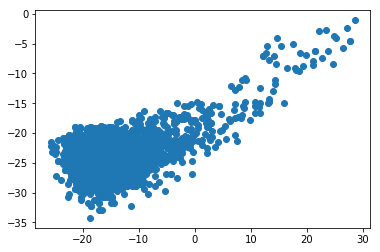

In [61]:
img2 = train.loc[8][['band_1','band_2']] # this is an iceberg
print(train.loc[8].is_iceberg)
plt.scatter(img2.band_1, img2.band_2)
plt.show()

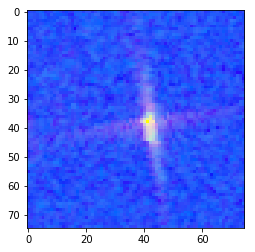

In [62]:
plt.imshow(rgb_train[8, :, :])

In [67]:
def equalize_histogram(img, histogram, cfs):
    """
    Equalize pixel values to [0:255].
    """
    total_pixels = img.size
    N, M = img.shape
    min_value = img.min()
    L = 256  # Number of levels of grey
    cfs_min = cfs.min()
    img_corrected = np.zeros_like(img)
    corrected_values = np.zeros_like(histogram)

    divisor = np.float32(total_pixels) - np.float32(cfs_min)

    if not divisor:  # this happens when the image has all the values equals
        divisor = 1.0

    factor = (np.float32(L) - 1.0) / divisor

    corrected_values = ((np.float32(cfs) -
                         np.float32(cfs_min)) * factor).round()

    img_copy = np.uint64(img - min_value)
    img_corrected = corrected_values[img_copy]

    return img_corrected


def equalization_using_histogram(img):

    # Create histogram, bin edges and cumulative distributed function
    max_value = img.max()
    min_value = img.min()

    assert min_value >= 0, \
        "ERROR: equalization_using_histogram() img have negative values!"

    start, stop, step = int(min_value), int(max_value + 2), 1

    histogram, bin_edge = np.histogram(img, range(start, stop, step))
    cfs = histogram.cumsum()  # cumulative frencuency table
    img_corrected = equalize_histogram(img, histogram, cfs)

    return img_corrected

In [68]:
#equalize img to 0:255
image_eq = equalization_using_histogram(rgb_train[8, :, :])

ValueError: too many values to unpack (expected 2)

In [69]:
rgb_train[8, :, :].shape

(75, 75, 3)

In [70]:
import colorsys

In [74]:
colorsys.rgb_to_hsv(rgb_train[8, 0, 0, 0],rgb_train[8, 0, 0, 1],rgb_train[8, 0, 0, 2])[0]

0.64668233347380299

In [86]:
def RGB_to_HSV(rgb_data):
    hsv_data = np.zeros_like(rgb_data)
    for i in range(np.shape(rgb_data)[0]):
        for x in range(np.shape(rgb_data)[1]):
            for y in range(np.shape(rgb_data)[2]):
                hsv = list(colorsys.rgb_to_hsv(rgb_data[i,x,y,0],rgb_data[i,x,y,1],rgb_data[i,x,y,2]))
                #print(hsv)
                hsv_data[i,x,y,:] = hsv
    """             
    HSV_arrays = []
    for i, row in data.iterrows():
        H = []
        S = []
        V = []
        for j in range(length(np.array(row['band_1']))):
            R = np.array(row['band_1'])[j]
            G = np.array(row['band_2'])[j]
            B = np.array(row['band_1'])[j]/np.array(row['band_2'])[j]
            H.append( colorsys.rgb_to_hsv(R,G,B)[0] )
            S.append( colorsys.rgb_to_hsv(R,G,B)[1] )
            V.append( colorsys.rgb_to_hsv(R,G,B)[2] )
                       
        band_1 = np.array(H).reshape(75, 75)
        band_2 = np.array(S).reshape(75, 75)
        band_3 = np.array(V).reshape(75, 75)
        HSV = np.dstack((r, g, b))
        HSV_arrays.append(HSV)
    """
    return hsv_data

HSV_train = RGB_to_HSV(rgb_train)
plt.imshow(HSV_train[12,:,:,2])
plt.show()

IndexError: index 3 is out of bounds for axis 3 with size 3

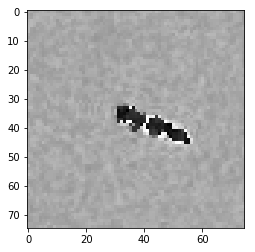

In [107]:
plt.imshow(HSV_train[100,:,:,0],cmap = 'gray')
plt.show()

In [109]:
HSV_train[100,:,:,0].min()

0.0018298559729874413

In [114]:
import matplotlib.pyplot as plt

from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.measure import compare_psnr

ImportError: cannot import name 'denoise_wavelet'

In [1]:
import cv2